In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, font_manager
sns.set(style='darkgrid')
%matplotlib inline
# 한글 처리를 위한 폰트 설정
font_name= font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
# 그림 크기 설정
plt.rcParams['figure.figsize']=(12,9)
# 마이너스 표기
plt.rcParams['axes.unicode_minus']=False
# 타이타닉 데이터 로드
titanic= sns.load_dataset('titanic')
# Tips 데이터 로드
tips=sns.load_dataset('tips')

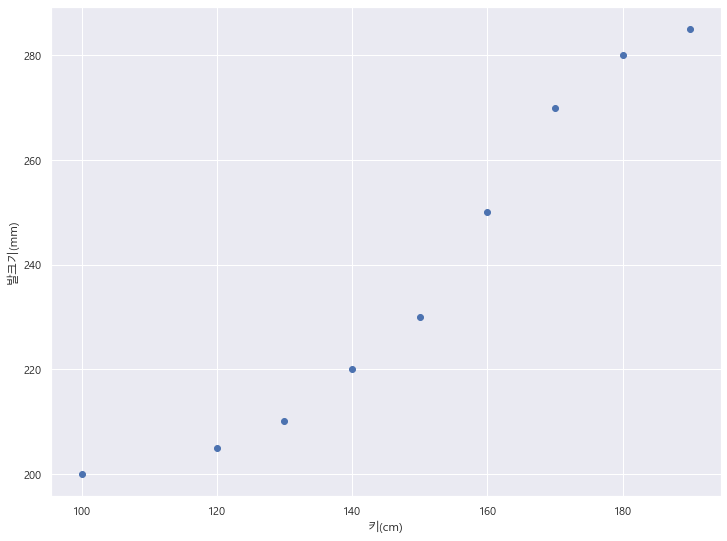

In [7]:
height = [100,120,130,140,150,160,170,180,190]
foot_size=[200,205,210,220,230,250,270,280,285]

plt.scatter(height,foot_size)
plt.xlabel('키(cm)')
plt.ylabel('발크기(mm)')
plt.show()

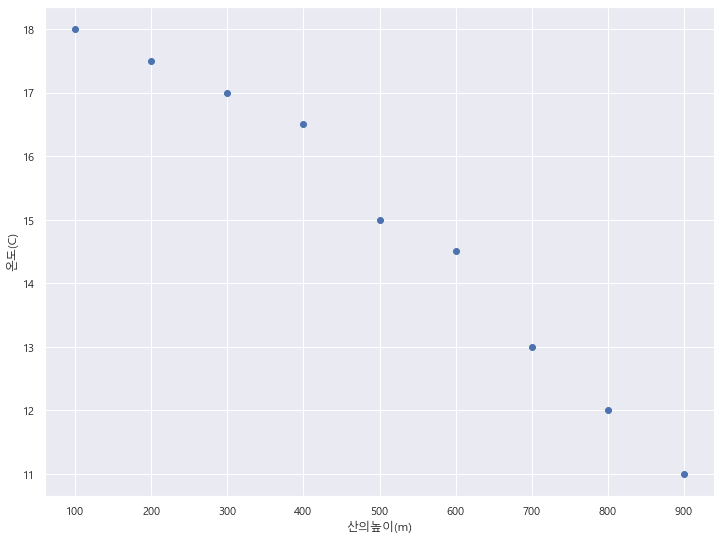

In [25]:
h=[100,200,300,400,500,600,700,800,900]
t=[18.0,17.5,17,16.5,15,14.5,13,12,11]

plt.scatter(h,t)
plt.xlabel('산의높이(m)')
plt.ylabel('온도(C)')
plt.show()

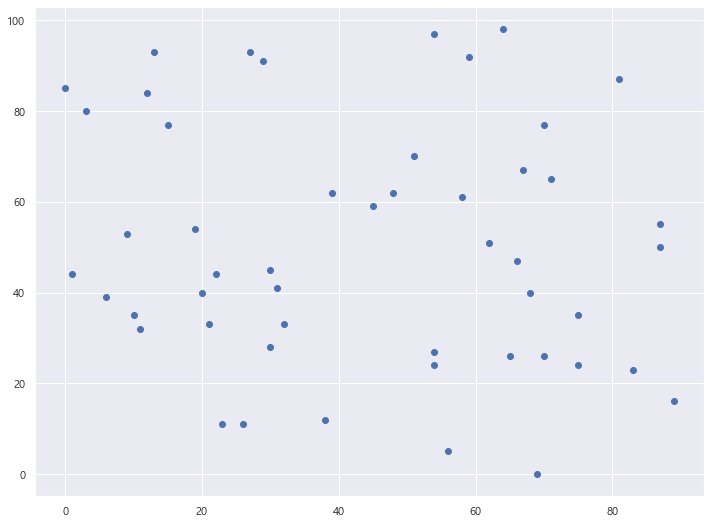

In [26]:
#random.randint(start,end,size)
random_x=np.random.randint(0,100,50)
random_y=np.random.randint(0,100,50)
plt.scatter(random_x, random_y)
plt.show()

0.966126323516351


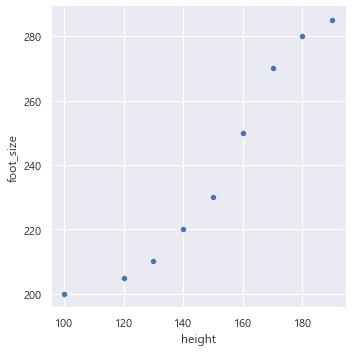

In [33]:
df=pd.DataFrame({'height':height, 'foot_size':foot_size})
sns.relplot(x='height',y='foot_size', data=df)

print(df.height.corr(df.foot_size))